In [1]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/scripts/Mixture + Analytes/3 Analytes/')

from utils import add_noise, plot_lda_decision_boundary, plot_pca_decision_boundary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re

import warnings
warnings.filterwarnings('ignore')
os.chdir('/home/soham/Desktop/GitHub/BTP/')

## Training model on 3 Analyte data

In [2]:
total_data = pd.read_csv('data/labelled/labelled.csv')

total_data = total_data.drop(['CFU/mL'], axis=1)
labels = total_data['label']

total_data.head()

,Sensor2,Sensor1,Sensor3,label
0,70.734,-68.02,52.47,1
1,50.162,-95.70,32.63,1
2,-8.390,-99.96,-10.41,1
3,-18.700,-107.42,-23.93,1
4,-19.620,-109.94,-27.24,1


In [3]:
## PCA

X = total_data[['Sensor1','Sensor2','Sensor3']]
Y = total_data['label']
label_mapping = {1: 'A1', 2: 'A2', 3: 'A3'}

pca  = PCA(n_components=2)
pca.fit(X)
pca_data = pca.transform(X)
pca_data = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

pca_X_train, pca_X_test, pca_Y_train, pca_Y_test = train_test_split(pca_data, Y, test_size=0.3, random_state=np.random.randint(0,100))



## LDA

X = total_data[['Sensor1','Sensor2','Sensor3']]
Y = total_data['label']
label_mapping = {1: 'A1', 2: 'A2', 3: 'A3'}

lda  = LDA(n_components=2)
lda.fit(X, Y)
lda_data = lda.transform(X)
lda_data = pd.DataFrame(lda_data, columns=['LD1', 'LD2'])

lda_X_train, lda_X_test, lda_Y_train, lda_Y_test = train_test_split(lda_data, Y, test_size=0.3, random_state=np.random.randint(0,100))

## Training

In [4]:
pca_svm = SVC(kernel='linear')
pca_svm.fit(pca_X_train, pca_Y_train)

print('Training accuracy = ', pca_svm.score(pca_X_train, pca_Y_train))

pred = pca_svm.predict(pca_X_test)
print('Testing accuracy = ', accuracy_score(pca_Y_test, pred))

Training accuracy =  1.0
Testing accuracy =  0.9565217391304348


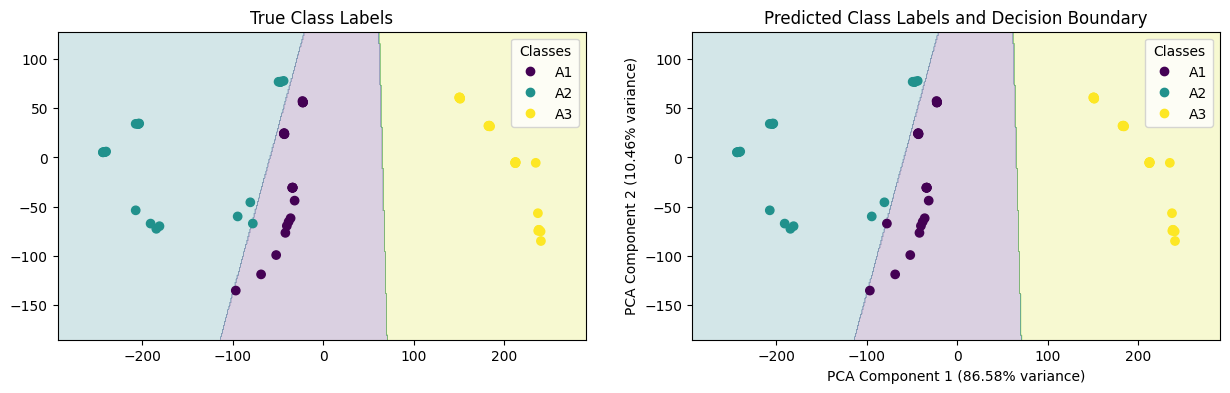

In [5]:
pca_data['Labels'] = total_data['label'].map(label_mapping)
plot_pca_decision_boundary(pca, pca_data, pca_svm, label_mapping)

In [6]:
lda_svm = SVC(kernel='linear')
lda_svm.fit(lda_X_train, lda_Y_train)

print('Training accuracy = ', lda_svm.score(lda_X_train, lda_Y_train))

pred = lda_svm.predict(lda_X_test)
print('Testing accuracy = ', accuracy_score(lda_Y_test, pred))

Training accuracy =  1.0
Testing accuracy =  1.0


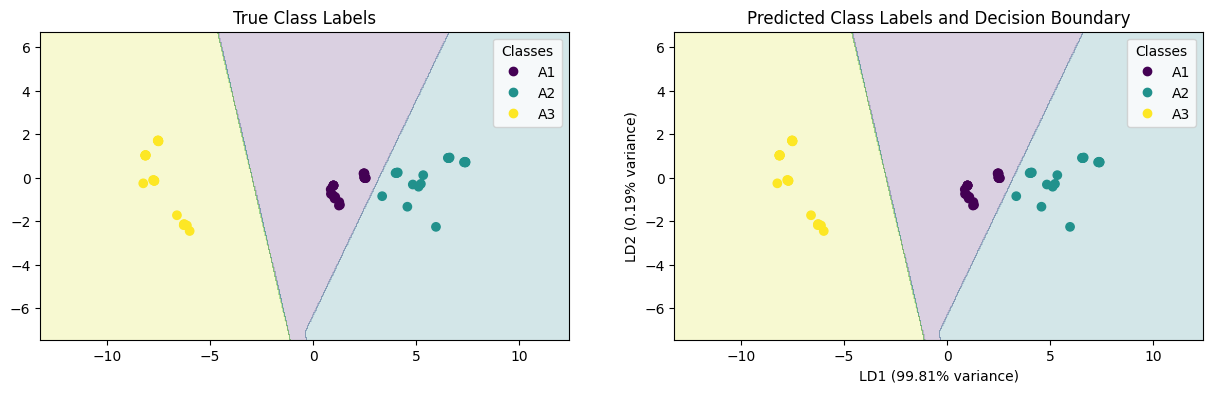

In [7]:
lda_data['Labels'] = total_data['label'].map(label_mapping)
plot_lda_decision_boundary(lda, lda_data, lda_svm, label_mapping)

In [8]:
pca_rfc = RFC(n_estimators=100)
pca_rfc.fit(pca_X_train, pca_Y_train)

print('Training accuracy = ', pca_rfc.score(pca_X_train, pca_Y_train))

pred = pca_rfc.predict(pca_X_test)
print('Testing accuracy = ', accuracy_score(pca_Y_test, pred))

Training accuracy =  1.0
Testing accuracy =  0.9130434782608695


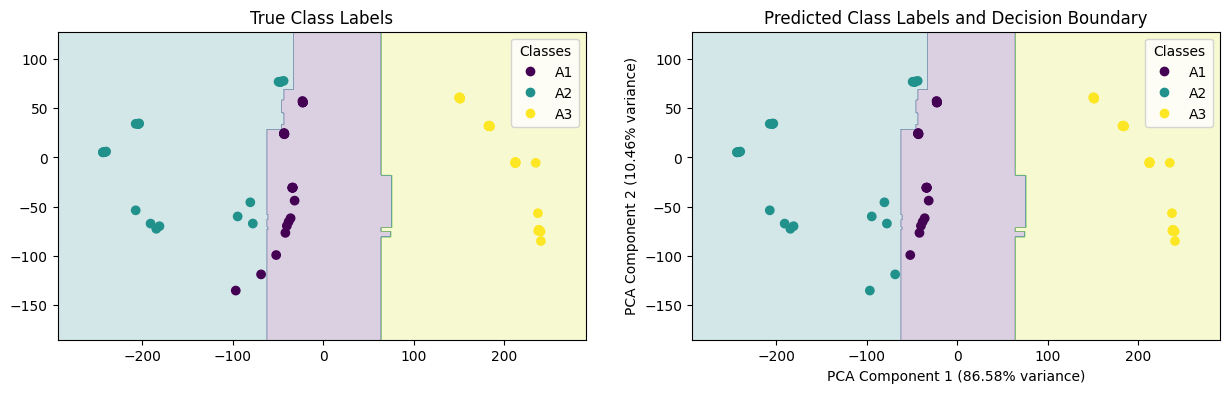

In [9]:
pca_data['Labels'] = total_data['label'].map(label_mapping)
plot_pca_decision_boundary(pca, pca_data, pca_rfc, label_mapping)

In [10]:
lda_rfc = RFC(n_estimators=100)
lda_rfc.fit(lda_X_train, lda_Y_train)

print('Training accuracy = ', lda_rfc.score(lda_X_train, lda_Y_train))

pred = lda_rfc.predict(lda_X_test)
print('Testing accuracy = ', accuracy_score(lda_Y_test, pred))

Training accuracy =  1.0
Testing accuracy =  1.0


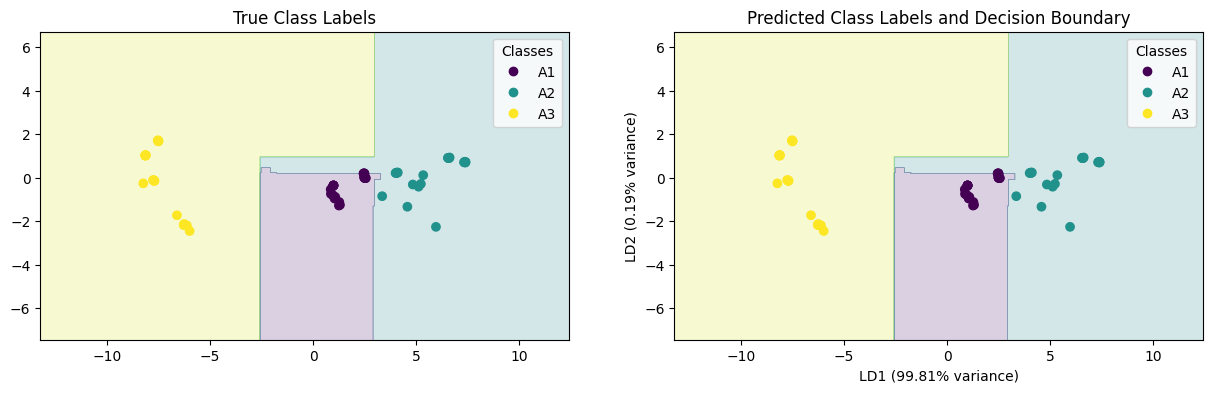

In [11]:
lda_data['Labels'] = total_data['label'].map(label_mapping)
plot_lda_decision_boundary(lda, lda_data, lda_rfc, label_mapping)

# Predicting on Mixtures Data

In [12]:
mixture_lda_data = pd.read_excel('data/mixture/8 solutions/LDA_with_112_121.xlsx')
mixture_pca_data = pd.read_excel('data/mixture/8 solutions/PCA_with_112_121.xlsx')

### Predicting PCA using SVM 

In [13]:
svm_predictions = pca_svm.predict(mixture_pca_data[['PC1', 'PC2']])
mixture_pca_data['Predictions'] = svm_predictions
mixture_pca_data['Predictions'] = mixture_pca_data['Predictions'].map(label_mapping)
mixture_pca_data.head()

,PC1,PC2,Labels,Predictions
0,-187.890728,-7.931970,A1,A2
1,-202.043966,-42.657566,A1,A2
2,-185.621412,-92.832078,A1,A2
3,-189.646498,-106.343482,A1,A2
4,-192.093846,-108.870334,A1,A2


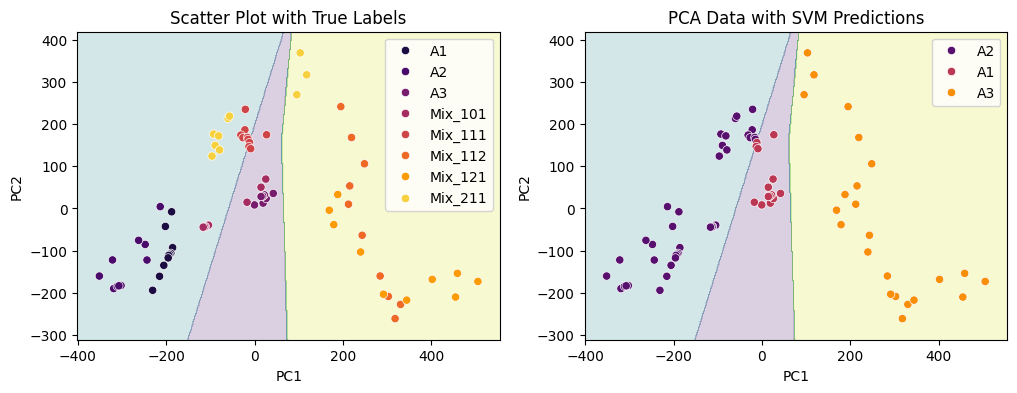

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

x_min, x_max = mixture_pca_data['PC1'].min() - 50, mixture_pca_data['PC1'].max() + 50
y_min, y_max = mixture_pca_data['PC2'].min() - 50, mixture_pca_data['PC2'].max() + 50
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = pca_svm.predict(np.c_[xx.ravel().astype(float), yy.ravel().astype(float)])
Z = Z.reshape(xx.shape)

axs[0].contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
sns.scatterplot(data=mixture_pca_data, x='PC1', y='PC2', hue='Labels', ax=axs[0], palette='inferno')
axs[0].set_title('Scatter Plot with True Labels')
axs[0].legend(loc='best')

axs[1].contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
sns.scatterplot(data=mixture_pca_data, x='PC1', y='PC2', hue='Predictions', ax=axs[1], palette='inferno')
axs[1].set_title('PCA Data with SVM Predictions')
axs[1].legend(loc='best')

plt.show()

### Predicting PCA using RFC

In [15]:
rfc_predictions = pca_rfc.predict(mixture_pca_data[['PC1', 'PC2']])
mixture_pca_data['Predictions'] = rfc_predictions
mixture_pca_data['Predictions'] = mixture_pca_data['Predictions'].map(label_mapping)
mixture_pca_data.head()

,PC1,PC2,Labels,Predictions
0,-187.890728,-7.931970,A1,A2
1,-202.043966,-42.657566,A1,A2
2,-185.621412,-92.832078,A1,A2
3,-189.646498,-106.343482,A1,A2
4,-192.093846,-108.870334,A1,A2


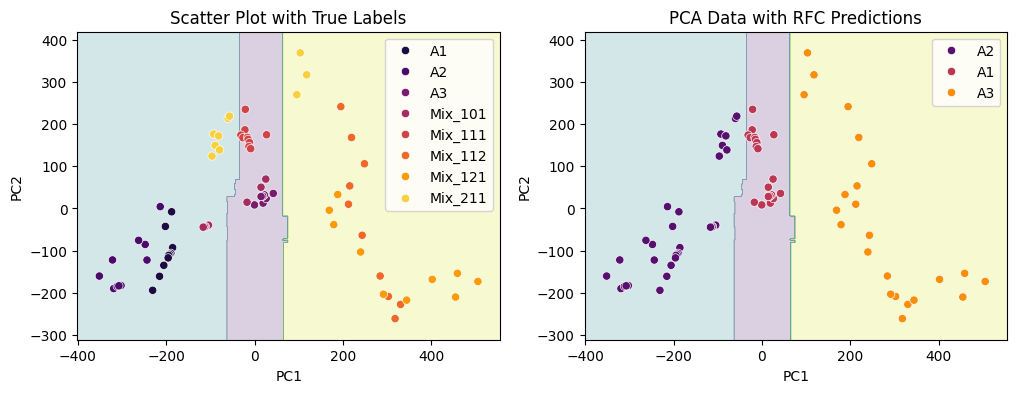

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

x_min, x_max = mixture_pca_data['PC1'].min() - 50, mixture_pca_data['PC1'].max() + 50
y_min, y_max = mixture_pca_data['PC2'].min() - 50, mixture_pca_data['PC2'].max() + 50
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = pca_rfc.predict(np.c_[xx.ravel().astype(float), yy.ravel().astype(float)])
Z = Z.reshape(xx.shape)

axs[0].contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
sns.scatterplot(data=mixture_pca_data, x='PC1', y='PC2', hue='Labels', ax=axs[0], palette='inferno')
axs[0].set_title('Scatter Plot with True Labels')
axs[0].legend(loc='best')

axs[1].contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
sns.scatterplot(data=mixture_pca_data, x='PC1', y='PC2', hue='Predictions', ax=axs[1], palette='inferno')
axs[1].set_title('PCA Data with RFC Predictions')
axs[1].legend(loc='best')

plt.show()

### Predicting LDA on SVM

In [17]:
svm_predictions = lda_svm.predict(mixture_lda_data[['LD1', 'LD2']])
mixture_lda_data['Predictions'] = svm_predictions
mixture_lda_data['Predictions'] = mixture_lda_data['Predictions'].map(label_mapping)
mixture_lda_data.head()

,LD1,LD2,Labels,Predictions
0,4.028489,-0.112134,A1,A2
1,4.394760,-0.333785,A1,A2
2,3.983606,-0.493548,A1,A2
3,4.028883,-0.515631,A1,A2
4,4.064155,-0.511202,A1,A2


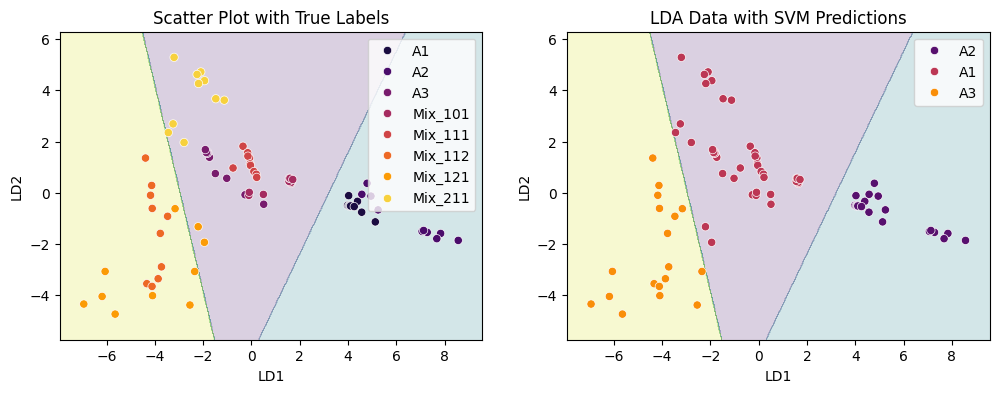

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

x_min, x_max = mixture_lda_data['LD1'].min() - 1, mixture_lda_data['LD1'].max() + 1
y_min, y_max = mixture_lda_data['LD2'].min() - 1, mixture_lda_data['LD2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = lda_svm.predict(np.c_[xx.ravel().astype(float), yy.ravel().astype(float)])
Z = Z.reshape(xx.shape)

axs[0].contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
sns.scatterplot(data=mixture_lda_data, x='LD1', y='LD2', hue='Labels', ax=axs[0], palette='inferno')
axs[0].set_title('Scatter Plot with True Labels')
axs[0].legend(loc='best')

axs[1].contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
sns.scatterplot(data=mixture_lda_data, x='LD1', y='LD2', hue='Predictions', ax=axs[1], palette='inferno')
axs[1].set_title('LDA Data with SVM Predictions')
axs[1].legend(loc='best')

plt.show()

### Predicting LDA on RFC

In [19]:
rfc_predictions = lda_rfc.predict(mixture_lda_data[['LD1', 'LD2']])
mixture_lda_data['Predictions'] = rfc_predictions
mixture_lda_data['Predictions'] = mixture_lda_data['Predictions'].map(label_mapping)
mixture_lda_data.head()

,LD1,LD2,Labels,Predictions
0,4.028489,-0.112134,A1,A2
1,4.394760,-0.333785,A1,A2
2,3.983606,-0.493548,A1,A2
3,4.028883,-0.515631,A1,A2
4,4.064155,-0.511202,A1,A2


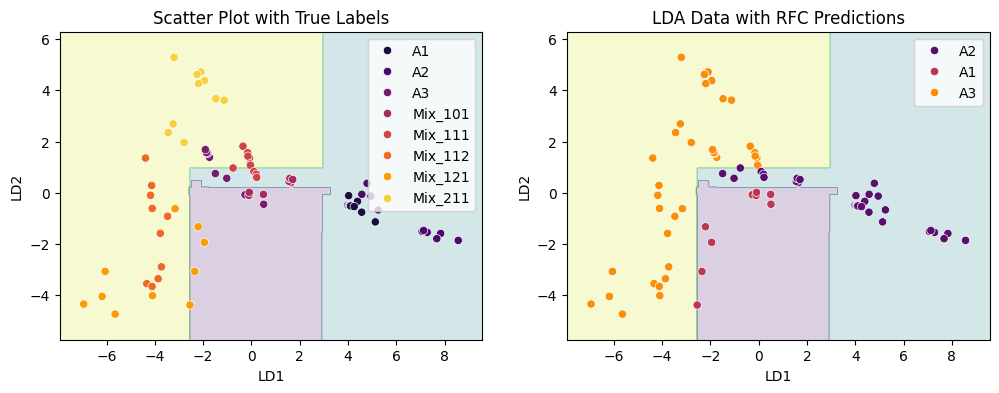

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

x_min, x_max = mixture_lda_data['LD1'].min() - 1, mixture_lda_data['LD1'].max() + 1
y_min, y_max = mixture_lda_data['LD2'].min() - 1, mixture_lda_data['LD2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = lda_rfc.predict(np.c_[xx.ravel().astype(float), yy.ravel().astype(float)])
Z = Z.reshape(xx.shape)

axs[0].contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
sns.scatterplot(data=mixture_lda_data, x='LD1', y='LD2', hue='Labels', ax=axs[0], palette='inferno')
axs[0].set_title('Scatter Plot with True Labels')
axs[0].legend(loc='best')

axs[1].contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
sns.scatterplot(data=mixture_lda_data, x='LD1', y='LD2', hue='Predictions', ax=axs[1], palette='inferno')
axs[1].set_title('LDA Data with RFC Predictions')
axs[1].legend(loc='best')

plt.show()